In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
import random
import string
from termcolor import colored as cl 

In [2]:
# Load the credit card transaction data 
df = pd.read_excel(r'C:\Users\KABYADE\Desktop\Fraud_ML\dataset\preprocessing_data.xlsx')
df.head(3)
#df.info()

,V1,V2,V3,V4,V9,V10,V12,V13,V16,V19,...,SIN(V7_day),SIN(V23_month),SIN(V23_day),SIN(V8_month),SIN(V8_day),V6_year,V7_year,V23_year,V8_year,CLASS
0,4,2,23,1,774798,705493.0,19,2976,44,20292,...,7.657137e-16,0.201299,0.937752,0.174152,-0.201299,2009,2011,2009,2009,0
1,4,2,23,1,643212,239806.0,19,2976,44,1344,...,7.657137e-16,0.201299,0.937752,-0.368810,0.937752,2009,2011,2009,2009,0
2,4,2,23,1,136410,725678.0,19,2976,44,25327,...,7.657137e-16,0.201299,0.937752,0.174152,-0.394356,2008,2009,2009,2009,0


In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V12', 'V13', 'V16', 'V19', 'V21',
       'V22', 'V24', 'V25', 'V26', 'V27', 'COS(V6_month)', 'COS(V6_day)',
       'COS(V7_month)', 'COS(V7_day)', 'COS(V23_month)', 'COS(V23_day)',
       'COS(V8_month)', 'COS(V8_day)', 'SIN(V6_month)', 'SIN(V6_day)',
       'SIN(V7_month)', 'SIN(V7_day)', 'SIN(V23_month)', 'SIN(V23_day)',
       'SIN(V8_month)', 'SIN(V8_day)', 'V6_year', 'V7_year', 'V23_year',
       'V8_year', 'CLASS'],
      dtype='object')

In [33]:
#REMOVE due to fixed value prb
df.drop(['V7_day','V6_day'], axis=1, inplace=True)

In [ ]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap of the correlation matrix
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(corr)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr)), corr.columns)
plt.show()

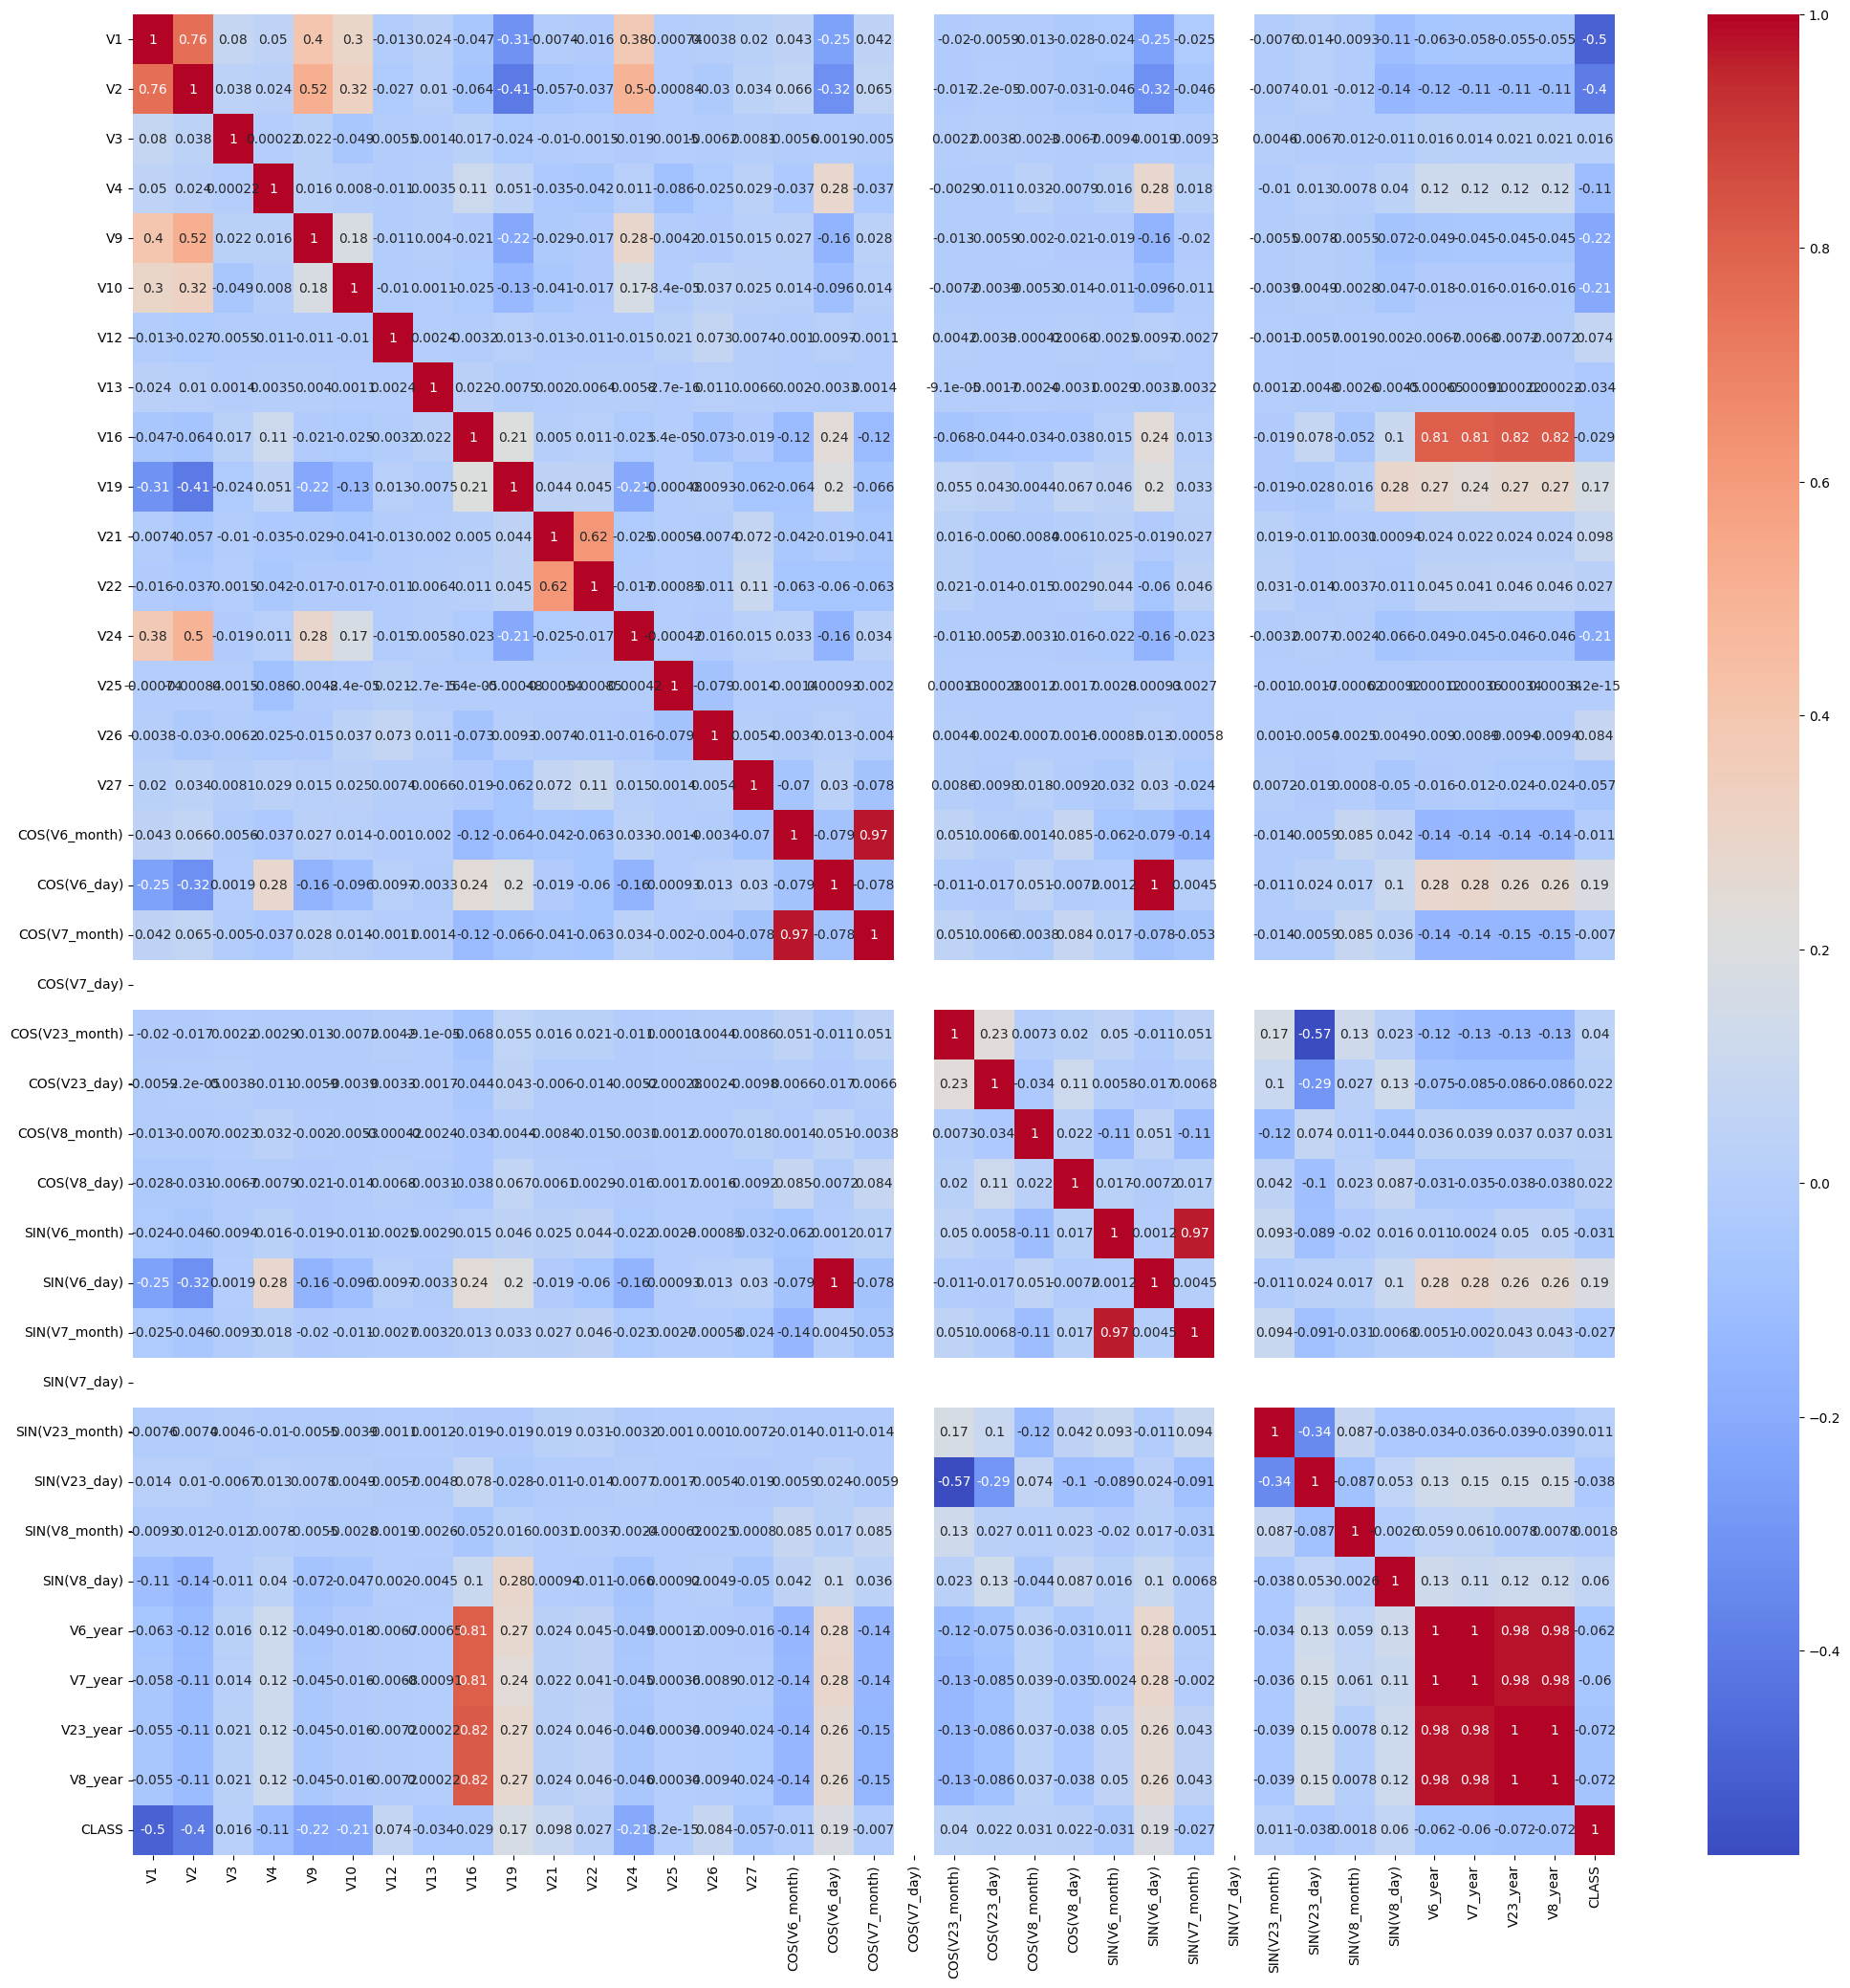

In [6]:
corr = df.corr()
# Plot the correlation matrix as a heatmap
# Create the heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.show()

In [ ]:
# Extract the highly correlated features (absolute correlation value >= 0.5)
highly_correlated_features = [
    column for column in corr.columns 
        if corr[column].sort_values(ascending=False).iloc[1] >= 0.5
    ]

# Keep only the highly correlated features
data = df[highly_correlated_features]
data.columns


for column in corr.columns: 
    #if corr[column].sort_values(ascending=False).iloc[1] >= 0.1:
    print(round(corr[column].sort_values(ascending=False).iloc[1],2),"  ",column )

#features that have a high correlation with our target variable isFraud.
res=corr["isFraud"].sort_values(ascending=False)
res